In [95]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns

### Read data from file

In [96]:
df = pd.read_csv('Data_Cleaned.csv')
df

,Player,Team,Position,Apps,Mins,Goals,Assists,YelCard,RedCard,SpG,PS,AerialsWon,MotM,Ratting
0,Lionel Messi,PSG,"AM(CR),FW",23,2032,13,13,0,0,4.3,82.6,0.0,12,8.46
1,Kylian Mbappé,PSG,"AM(LR),FW",22,1922,19,3,5,0,4.3,82.8,0.3,3,7.72
2,Martin Terrier,Rennes,"AM(CL),FW",16,1330,9,4,0,0,2.9,75.3,3.9,7,7.71
3,Neymar,PSG,"AM(CLR),FW",18,1553,13,11,4,1,1.9,82.7,0.1,3,7.71
4,Khvicha Kvaratskhelia,Napoli,AM(CLR),22,1743,12,10,0,0,2.9,81.9,0.3,7,7.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1545,Arnau Puigmal,Almeria,Midfielder,2,388,0,0,3,0,0.8,78.5,0.1,0,6.11
1546,Will Hughes,Crystal Palace,M(CLR),3,408,0,0,4,0,0.1,79.5,0.2,0,6.11
1547,Josan,Elche,"D(R),M(R)",3,440,1,0,3,0,0.2,81.8,0.2,0,6.11
1548,Gonzalo Villar,Sampdoria,DMC,8,695,0,0,2,0,0.1,84.2,0.6,0,6.08


- Set colors 

In [97]:
colors = []
for i in range(len(df.columns)):
    colors.append('#' + ''.join([np.random.choice(list('0123456789ABCDEF')) for j in range(6)]))

### Overview for each columns in dataset

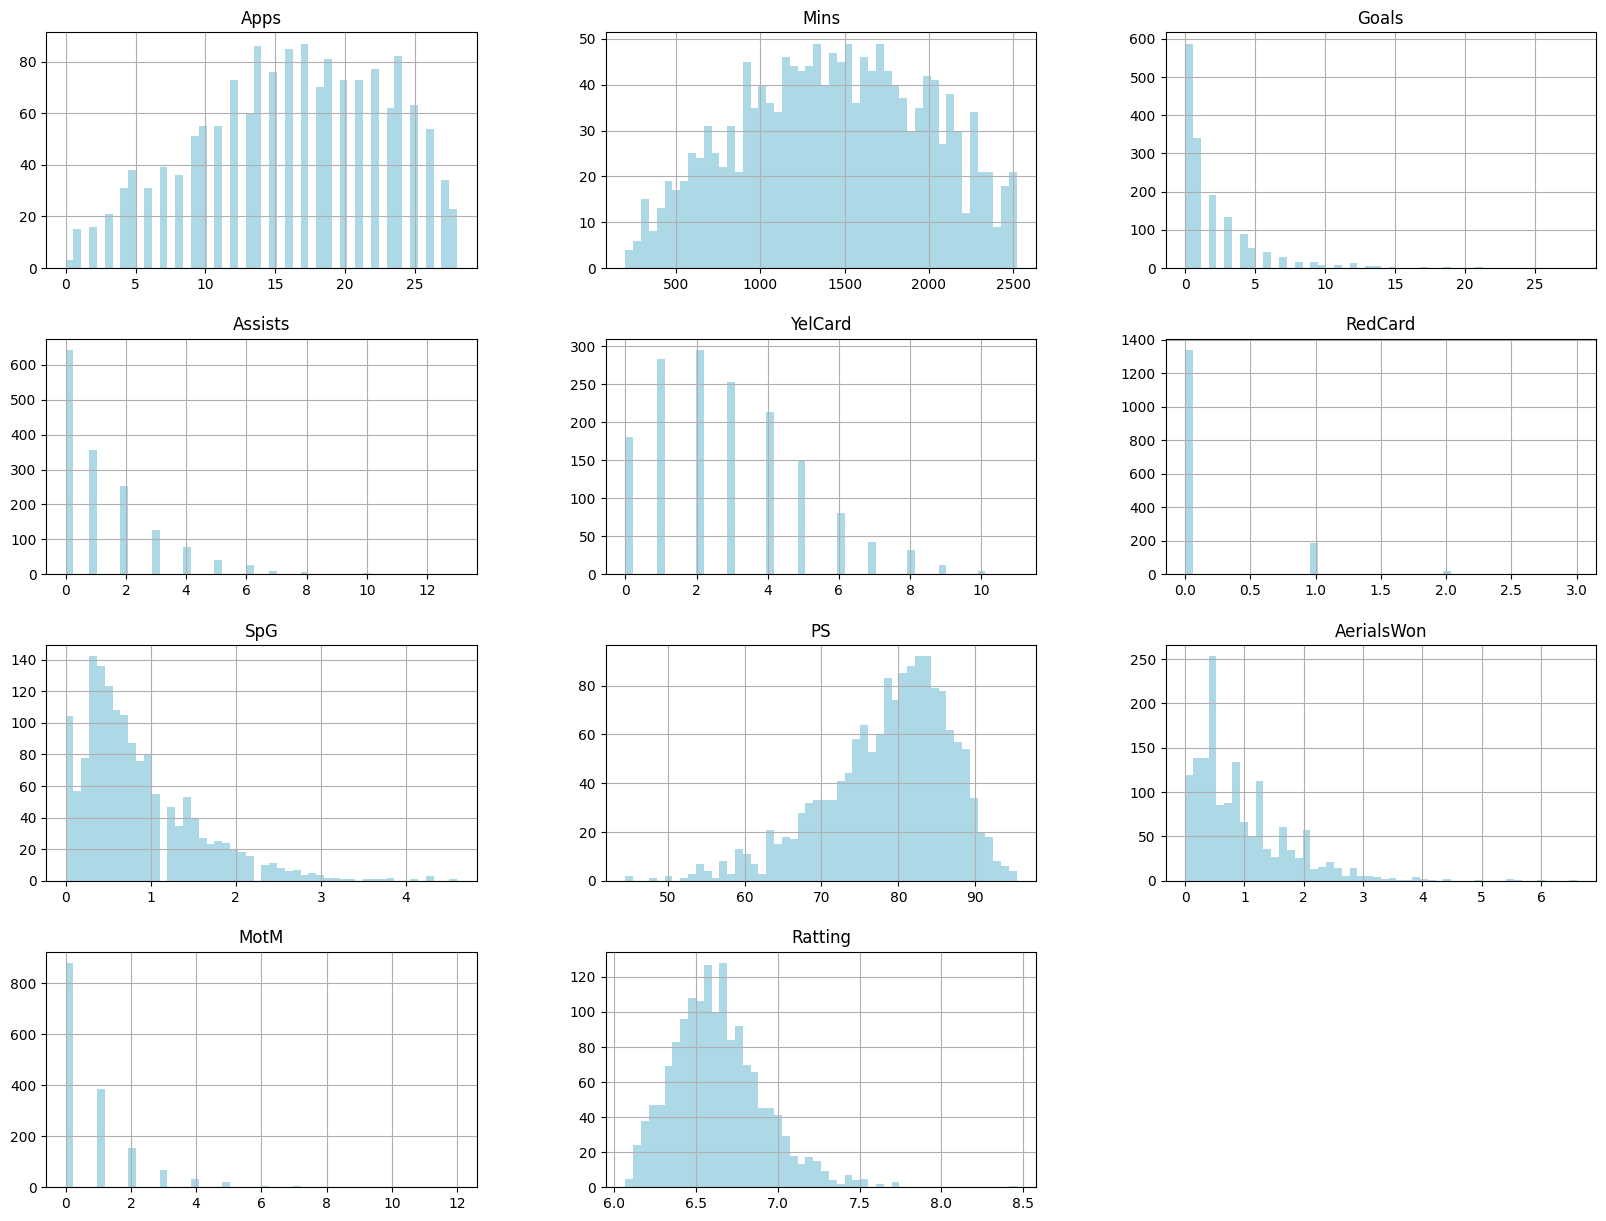

In [98]:
df.hist(bins=50, figsize=(20,15),color= 'lightblue')
plt.show()

#### So, I want to show Top 5 teams with the total goals

Team
Bayern      70
PSG         66
Man City    65
Napoli      62
Arsenal     59
Name: Goals, dtype: int64


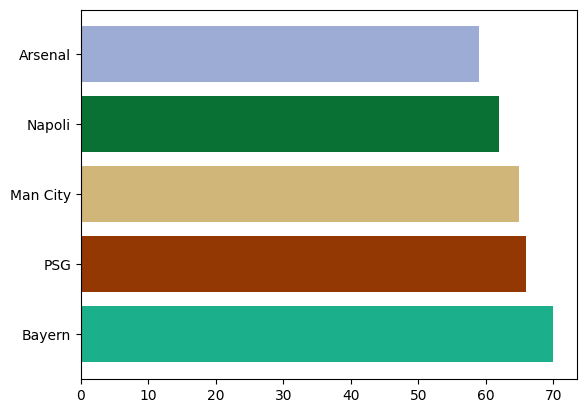

In [99]:
features =df[['Team','Goals']].copy()
compare= features.groupby('Team').sum().sort_values("Goals", ascending= False)
compare= compare[:5]
print(compare.iloc[:,0])

plt.barh(compare.iloc[:,0].index, compare.iloc[:,0].values, color = colors)
plt.show()

#### Second, i want to show list the best players

In [100]:
df_best_players = pd.DataFrame(df.copy())

### Standardized data

In [101]:
df_best_players['Normalize_Goals']=(df_best_players['Goals']- df_best_players['Goals'].min()) / (df_best_players['Goals'].max() - df_best_players['Goals'].min())
df_best_players['Normalize_Appears']=(df_best_players['Apps']- df_best_players['Apps'].min()) / (df_best_players['Apps'].max() - df_best_players['Apps'].min())
df_best_players['Normalize_Assists']=(df_best_players['Assists']- df_best_players['Assists'].min()) / (df_best_players['Assists'].max() - df_best_players['Assists'].min())
df_best_players['Normalize_YelCard']=(df_best_players['YelCard']- df_best_players['YelCard'].min()) / (df_best_players['YelCard'].max() - df_best_players['YelCard'].min())
df_best_players['Normalize_RedCard']=(df_best_players['RedCard']- df_best_players['RedCard'].min()) / (df_best_players['RedCard'].max() - df_best_players['RedCard'].min())

### Show dataset

In [102]:
df_best_players.head()

,Player,Team,Position,Apps,Mins,Goals,Assists,YelCard,RedCard,SpG,PS,AerialsWon,MotM,Ratting,Normalize_Goals,Normalize_Appears,Normalize_Assists,Normalize_YelCard,Normalize_RedCard
0,Lionel Messi,PSG,"AM(CR),FW",23,2032,13,13,0,0,4.3,82.6,0.0,12,8.46,0.464286,0.821429,1.000000,0.000000,0.000000
1,Kylian Mbappé,PSG,"AM(LR),FW",22,1922,19,3,5,0,4.3,82.8,0.3,3,7.72,0.678571,0.785714,0.230769,0.454545,0.000000
2,Martin Terrier,Rennes,"AM(CL),FW",16,1330,9,4,0,0,2.9,75.3,3.9,7,7.71,0.321429,0.571429,0.307692,0.000000,0.000000
3,Neymar,PSG,"AM(CLR),FW",18,1553,13,11,4,1,1.9,82.7,0.1,3,7.71,0.464286,0.642857,0.846154,0.363636,0.333333
4,Khvicha Kvaratskhelia,Napoli,AM(CLR),22,1743,12,10,0,0,2.9,81.9,0.3,7,7.64,0.428571,0.785714,0.769231,0.000000,0.000000


#### Set the conditions to filter unsatisfactory players

- I will remove Player have low value of each columns : Goals , Appears , YelCard ,RedCard because it may cause incorrect results

In [103]:
for i in range (len(df_best_players)):
    if df_best_players['Normalize_Goals'][i] <= 0.5 or df_best_players['Normalize_Appears'][i] <= 0.5 or df_best_players['Normalize_YelCard'][i] == 1 or df_best_players['Normalize_RedCard'][i] == 1 :
        df_best_players=df_best_players.drop(i, axis =0)

In [104]:
df_best_players.head()

,Player,Team,Position,Apps,Mins,Goals,Assists,YelCard,RedCard,SpG,PS,AerialsWon,MotM,Ratting,Normalize_Goals,Normalize_Appears,Normalize_Assists,Normalize_YelCard,Normalize_RedCard
1,Kylian Mbappé,PSG,"AM(LR),FW",22,1922,19,3,5,0,4.3,82.8,0.3,3,7.72,0.678571,0.785714,0.230769,0.454545,0.000000
5,Victor Osimhen,Napoli,FW,22,1916,21,4,4,0,4.3,71.0,2.0,4,7.60,0.750000,0.785714,0.307692,0.363636,0.000000
7,Erling Haaland,Man City,FW,25,2120,28,5,4,0,3.5,75.6,1.3,5,7.52,1.000000,0.892857,0.384615,0.363636,0.000000
10,Robert Lewandowski,Barcelona,FW,21,1772,15,5,0,1,3.8,79.2,1.6,6,7.51,0.535714,0.750000,0.384615,0.000000,0.333333
12,Harry Kane,Tottenham,"AM(C),FW",28,2508,21,2,4,0,3.6,71.8,1.7,5,7.49,0.750000,1.000000,0.153846,0.363636,0.000000


#### Compute mean of each columns

In [105]:
df_best_players.mean()

C:\Users\DELL\AppData\Local\Temp\ipykernel_13344\1222670353.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_best_players.mean()


Apps                   23.727273
Mins                 2050.909091
Goals                  18.636364
Assists                 3.727273
YelCard                 3.727273
RedCard                 0.090909
SpG                     3.345455
PS                     73.490909
AerialsWon              1.618182
MotM                    4.454545
Ratting                 7.396364
Normalize_Goals         0.665584
Normalize_Appears       0.847403
Normalize_Assists       0.286713
Normalize_YelCard       0.338843
Normalize_RedCard       0.030303
dtype: float64

- Filter out players who play as strikers

In [106]:
df_best_players= df_best_players.loc[ (df_best_players.Goals >= 11)]
df_best_players.head()

,Player,Team,Position,Apps,Mins,Goals,Assists,YelCard,RedCard,SpG,PS,AerialsWon,MotM,Ratting,Normalize_Goals,Normalize_Appears,Normalize_Assists,Normalize_YelCard,Normalize_RedCard
1,Kylian Mbappé,PSG,"AM(LR),FW",22,1922,19,3,5,0,4.3,82.8,0.3,3,7.72,0.678571,0.785714,0.230769,0.454545,0.000000
5,Victor Osimhen,Napoli,FW,22,1916,21,4,4,0,4.3,71.0,2.0,4,7.60,0.750000,0.785714,0.307692,0.363636,0.000000
7,Erling Haaland,Man City,FW,25,2120,28,5,4,0,3.5,75.6,1.3,5,7.52,1.000000,0.892857,0.384615,0.363636,0.000000
10,Robert Lewandowski,Barcelona,FW,21,1772,15,5,0,1,3.8,79.2,1.6,6,7.51,0.535714,0.750000,0.384615,0.000000,0.333333
12,Harry Kane,Tottenham,"AM(C),FW",28,2508,21,2,4,0,3.6,71.8,1.7,5,7.49,0.750000,1.000000,0.153846,0.363636,0.000000


- Visualization name and the average number of goals in total match

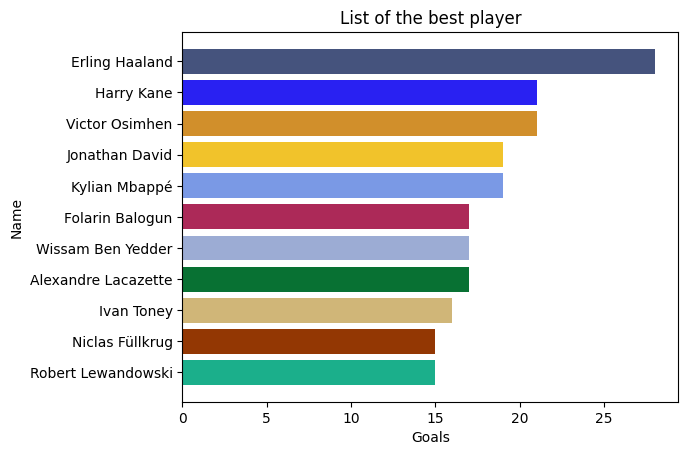

In [107]:
df_best_players = df_best_players.sort_values(by='Goals',ascending=True)
plt.barh(df_best_players['Player'],df_best_players['Goals'],color=colors)
plt.xlabel("Goals")
plt.ylabel("Name")
plt.title('List of the best player')
plt.show()

- Visualization overview about each attribute : Normalize Goals, Normalize Appears, Normalize Assists, Normalize Yellow Card

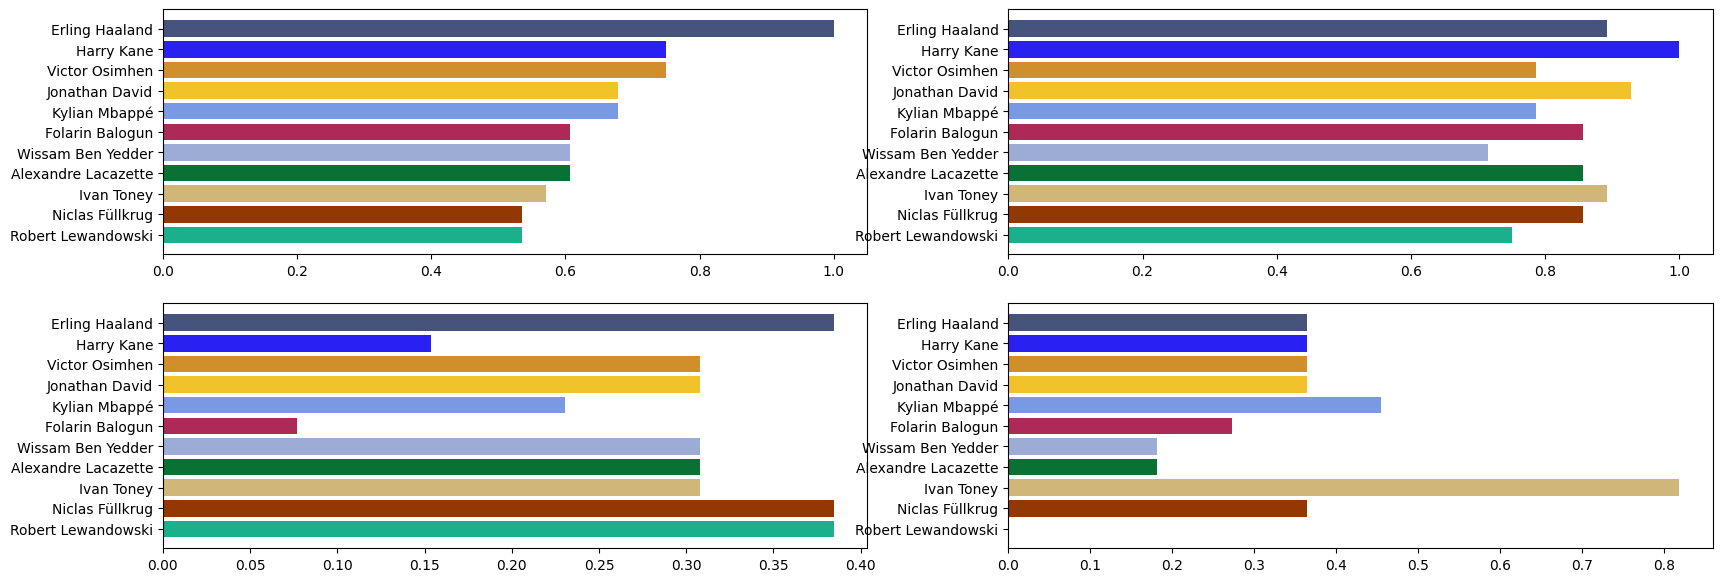

In [108]:
fig , ((ax1, ax2),(ax3,ax4))= plt.subplots(nrows =2, ncols = 2 , figsize=(20,7))
list_ = [df_best_players['Normalize_Goals'],df_best_players['Normalize_Appears'],df_best_players['Normalize_Assists'],df_best_players['Normalize_YelCard']]
ax1.barh (df_best_players['Player'], list_[0], color =colors)
ax2.barh (df_best_players['Player'],list_[1],color =colors)
ax3.barh (df_best_players['Player'],list_[2],color =colors)
ax4.barh (df_best_players['Player'],list_[3],color =colors)
plt.show()